In [148]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from queue import*
from collections import defaultdict
import random

## IO Code

In [66]:
def read_data(filename):
    data = []
    with open(filename, 'r', errors='ignore') as f:
        cols = f.readline().rstrip().split(',')
        print(cols)
        line = f.readline().rstrip()
        row = line.split(',')
        data.append(row)

        while line != '':
            commas = 0
            row = line.split(',')
            data.append(row)
            line = f.readline().rstrip()
    return data


def build_categories(data):
    categories = dict()
    for r in data:
        if r[0] not in categories:
            categories[r[0]] = [0, 0, 0]
        categories[r[0]][0] += float(r[2])  # rep
        categories[r[0]][1] += float(r[3])  # dem
        categories[r[0]][2] += float(r[4])  # ind
    return categories


def build_matrix(data, categories):
    matrix = dict()
    for r in data:
        if r[0] not in matrix:
            matrix[r[0]] = [dict(), dict(), dict()]

        if categories[r[0]][0] == 0:
            matrix[r[0]][0][r[1]] = 0
        else:
            matrix[r[0]][0][r[1]] = float(r[2]) / categories[r[0]][0]

        if categories[r[0]][1] == 0:
            matrix[r[0]][1][r[1]] = 0
        else:
            matrix[r[0]][1][r[1]] = float(r[3]) / categories[r[0]][1]

        if categories[r[0]][2] == 0:
            matrix[r[0]][2][r[1]] = 0
        else:
            matrix[r[0]][2][r[1]] = float(r[4]) / categories[r[0]][2]
    return matrix


def print_matrix(matrix):
    for k in matrix.keys():
        print(k)
        print(' Rep:')
        for t in matrix[k][0].keys():
            print('\t{0:100s} {1:5f}'.format(t, matrix[k][0][t]))
        print(' Dem:')
        for t in matrix[k][1].keys():
            print('\t{0:100s} {1:5f}'.format(t, matrix[k][1][t]))
        print(' Ind:')
        for t in matrix[k][2].keys():
            print('\t{0:100s} {1:5f}'.format(t, matrix[k][2][t]))
        print()

In [67]:
raw_data = read_data("class.csv")
categories = build_categories(raw_data)
matrix = build_matrix(raw_data, categories)

['Factor', 'Type', '% Lean Republican', '% Lean Democrat', '% No Leaning']


In [68]:
print_matrix(matrix)

Religious Service Attendance
 Rep:
	Once or Twice a Month                                                                                0.327273
	Weekly                                                                                               0.418182
	Seldom/ never                                                                                        0.254545
 Dem:
	Once or Twice a Month                                                                                0.348148
	Weekly                                                                                               0.274074
	Seldom/ never                                                                                        0.377778
 Ind:
	Once or Twice a Month                                                                                0.309091
	Weekly                                                                                               0.309091
	Seldom/ never                                                   

In [69]:
reps = []
dems = []
inds = []
for category in matrix:
    cat = matrix[category]
    r = cat[0]
    d = cat[1]
    i = cat[2]
    rrow = []
    drow = []
    irow = []
    for cls in r:
        rrow.append(r[cls])
    for cls in d:
        drow.append(d[cls])
    for cls in i:
        irow.append(i[cls])
        
    rsum = 0
    for r in rrow:
        rsum+=r
    if(rsum<1.0):
        rrow.append(1.0-rsum)
        
    dsum = 0
    for d in drow:
        dsum+=d
    if(dsum<1.0):
        drow.append(1.0-dsum)
        
    isum = 0
    for i in irow:
        isum+=i
    if(isum<1.0):
        irow.append(1.0-isum)
        
    reps.append(rrow)
    dems.append(drow)
    inds.append(irow)

## Build Datasets

In [159]:
X = []
y = []

In [160]:
for i in range(5000): #republicans
    person = []
    for featnum, feature in enumerate(reps):
        prob = random.random()
        append = False
        for featselection, value in enumerate(feature):
            if(prob<value):
                person.append(featselection)
                append = True
                break
            prob-=value
        if(append==False):
            print(prob, featnum, feature)
    X.append(person)
    y.append(0)

In [161]:
for i in range(5000): #democrats
    person = []
    for feature in dems:
        prob = random.random()
        for featselection, option in enumerate(feature):
            value = option
            if(prob<value):
                person.append(featselection)
                break
            prob-=value
    X.append(person)
    y.append(1)

In [162]:
for i in range(5000): #independents
    person = []
    for feature in inds:
        prob = random.random()
        for featselection, option in enumerate(feature):
            value = option
            if(prob<value):
                person.append(featselection)
                break
            prob-=value
    X.append(person)
    y.append(2)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

12000 3000 12000 3000


## Classifier

In [ ]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

In [114]:
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [146]:
clf = GradientBoostingClassifier(n_estimators=600)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=600, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [156]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.4975


## Correlation

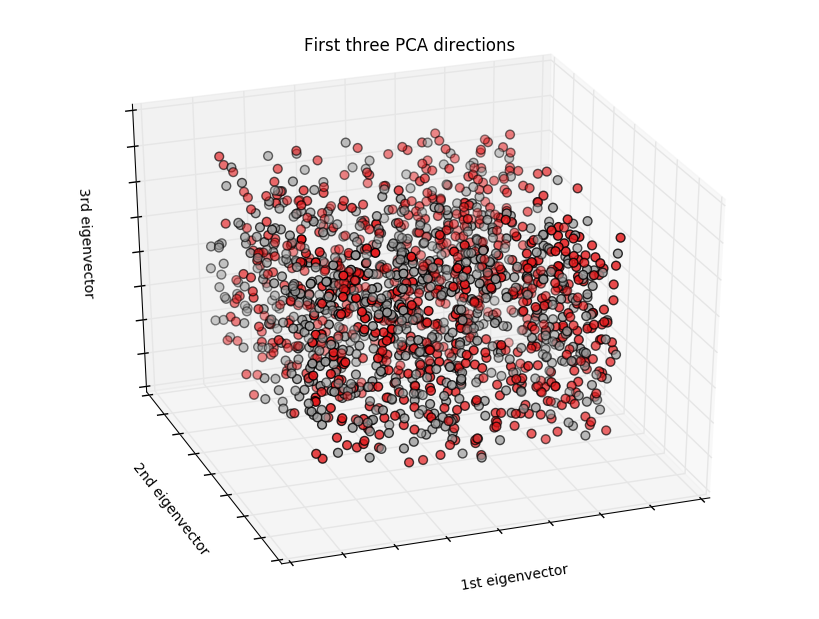

In [144]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_train)                    #This is X_train
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train,  #This is y_trian
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Confidence

In [145]:
print(clf.predict_proba(X_test[60]))
#print(clf.predict_proba(X_test))

[[  4.23237302e-04   9.99564681e-01   1.20815150e-05]]


C:\Users\mihir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
